In [25]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import math 
#import  statsmodels as sm 
#import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
plt.style.use('fivethirtyeight')
from plotly.plotly import plot_mpl
#from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.plotly as ply
import cufflinks as cf
#import cufflinks as cf
#import plotly
#from pyramid.arima import auto_arima

In [3]:
# Import annual data as DataFrame
annual_milk_production = pd.read_csv("Resources/us_annual_milk_production_16-18.csv")
annual_milk_production.head()

,Milk Production,2016,2017,2018
0,Production (23 States) (Mil. lb.),"199,434","202,455","204,825"
1,Milk cows (23 States) (Thou.),"8,653","8,725","8,734"
2,Milk per cow (23 States) (Lb.),"23,049","23,204","23,451"
3,Production (U.S. estimate) (Mil. Lb.),"212,405","215,466","217,476"


In [4]:
reset_milk_production = annual_milk_production.set_index('Milk Production')
reset_milk_production

,2016,2017,2018
Milk Production,,,
Production (23 States) (Mil. lb.),"199,434","202,455","204,825"
Milk cows (23 States) (Thou.),"8,653","8,725","8,734"
Milk per cow (23 States) (Lb.),"23,049","23,204","23,451"
Production (U.S. estimate) (Mil. Lb.),"212,405","215,466","217,476"


In [5]:
transpose_milk_production = reset_milk_production.transpose()
transpose_milk_production

Milk Production,Production (23 States) (Mil. lb.),Milk cows (23 States) (Thou.),Milk per cow (23 States) (Lb.),Production (U.S. estimate) (Mil. Lb.)
2016,"199,434","8,653","23,049","212,405"
2017,"202,455","8,725","23,204","215,466"
2018,"204,825","8,734","23,451","217,476"


In [6]:
annual_milk_price = pd.read_csv("Resources/us_annual_milk_price_16-18.csv")
annual_milk_price.head()

,Milk Price,2016,2017,2018
0,All milk (Dol./cwt),16.30,17.60,16.20
1,Class III (cheese milk) 3.5% fat (Dol./cwt),14.87,16.17,14.61
2,Class IV (butter-powder milk) 3.5% fat (Dol./cwt),13.77,15.16,14.23


In [7]:
reset_milk_price = annual_milk_price.set_index('Milk Price')
reset_milk_price

,2016,2017,2018
Milk Price,,,
All milk (Dol./cwt),16.30,17.60,16.20
Class III (cheese milk) 3.5% fat (Dol./cwt),14.87,16.17,14.61
Class IV (butter-powder milk) 3.5% fat (Dol./cwt),13.77,15.16,14.23


In [8]:
transpose_milk_price = reset_milk_price.transpose()
transpose_milk_price

Milk Price,All milk (Dol./cwt),Class III (cheese milk) 3.5% fat (Dol./cwt),Class IV (butter-powder milk) 3.5% fat (Dol./cwt)
2016,16.3,14.87,13.77
2017,17.6,16.17,15.16
2018,16.2,14.61,14.23


In [ ]:
#Index(['All milk (Dol./cwt)', 'Class III (cheese milk) 3.5% fat (Dol./cwt)',
       ##dtype='object', name='Milk Price')

In [9]:
merge_production_price = transpose_milk_production.merge(transpose_milk_price, on=transpose_milk_production.index)
merge_production_price

,key_0,Production (23 States) (Mil. lb.),Milk cows (23 States) (Thou.),Milk per cow (23 States) (Lb.),Production (U.S. estimate) (Mil. Lb.),All milk (Dol./cwt),Class III (cheese milk) 3.5% fat (Dol./cwt),Class IV (butter-powder milk) 3.5% fat (Dol./cwt)
0,2016,"199,434","8,653","23,049","212,405",16.3,14.87,13.77
1,2017,"202,455","8,725","23,204","215,466",17.6,16.17,15.16
2,2018,"204,825","8,734","23,451","217,476",16.2,14.61,14.23


In [10]:
reset_merge = merge_production_price.set_index('key_0')
reset_merge

,Production (23 States) (Mil. lb.),Milk cows (23 States) (Thou.),Milk per cow (23 States) (Lb.),Production (U.S. estimate) (Mil. Lb.),All milk (Dol./cwt),Class III (cheese milk) 3.5% fat (Dol./cwt),Class IV (butter-powder milk) 3.5% fat (Dol./cwt)
key_0,,,,,,,
2016,"199,434","8,653","23,049","212,405",16.3,14.87,13.77
2017,"202,455","8,725","23,204","215,466",17.6,16.17,15.16
2018,"204,825","8,734","23,451","217,476",16.2,14.61,14.23


In [11]:
renamed_milk_price_production = reset_merge.rename_axis('Year')
renamed_milk_price_production.head()

,Production (23 States) (Mil. lb.),Milk cows (23 States) (Thou.),Milk per cow (23 States) (Lb.),Production (U.S. estimate) (Mil. Lb.),All milk (Dol./cwt),Class III (cheese milk) 3.5% fat (Dol./cwt),Class IV (butter-powder milk) 3.5% fat (Dol./cwt)
Year,,,,,,,
2016,"199,434","8,653","23,049","212,405",16.3,14.87,13.77
2017,"202,455","8,725","23,204","215,466",17.6,16.17,15.16
2018,"204,825","8,734","23,451","217,476",16.2,14.61,14.23


In [12]:
time_series_analysis = pd.read_csv("Resources/us_annual_milk_production_factors_80-18.csv")
time_series_analysis.apply(pd.to_numeric).head()


,Year,Milk cows and heifers that have calved (thousand),"Replace-ment heifers, 500+ lbs. (thousand)",Replace-ments per 100 cows (thousand),Average number of milk cows in the U.S. (thousand),Milk per cow (pounds),Milk production (million pounds),Average price paid for milk (dollars per cwt),Dairy ration value (dollars per cwt),Milk-feed ratio,Milk Cow Price (dollars per head),"Milk Cow Cost, Milk volume required to buy a cow (pounds)",Alfalfa hay price received by farmers (dollars per ton),Slaughter cow price (dollars per cwt)
0,1980,10758.0,4159.0,38.7,10799.0,11891.0,128406.0,13.0,4.84,2.72,1190.0,9154.0,72.00,45.73
1,1981,10849.0,4342.0,40.0,10898.0,12183.0,132770.0,13.8,5.04,2.76,1200.0,8696.0,70.90,41.93
2,1982,10986.0,4547.0,41.4,11011.0,12306.0,135505.0,13.6,4.42,3.09,1110.0,8162.0,72.73,39.96
3,1983,11047.0,4545.0,41.1,11059.0,12622.0,139588.0,13.6,5.24,2.61,1030.0,7574.0,78.70,39.35
4,1984,11059.0,4533.0,41.0,10793.0,12541.0,135351.0,13.5,5.34,2.54,895.0,6630.0,79.48,39.81


In [ ]:
# Plot the world average as a line chart
#world_avg, = plt.plot(years, average_unemployment, color="blue", label="World Average" )

# Plot the unemployment values for a single country
#country_one, = plt.plot(years, combined_unemployed_data.loc['USA',["2010","2011","2012","2013","2014"]], 
                        #color="green",label=combined_unemployed_data.loc['USA',"Country Name"])

# Create a legend for our chart
#plt.legend(handles=[world_avg, country_one], loc="best")

# Show the chart
#plt.show()

#milk_re=plt.plot("Year", time_series_analysis.loc["Milk-feed ratio"],color="green",label=combined_unemployed_data.loc['USA',"Country Name"])

#time_series_analysis['date'] = time_series_analysis['Year'].map(str)
#time_series_analysis['date'] = pd.to_datetime(time_series_analysis['date'], format='%Y').dt.strftime('%Y')
#fig, ax = plt.subplots()
#time_analysis.plot(time_series_analysis['date'], time_series_analysis[['Milk per cow (pounds)']])
#plt.show()

#time_analysis=time_series_analysis[['Milk production (million pounds)']]
#time_analysis.plot(figsize=(20,10), linewidth=5, fontsize=20)
#plt.xlabel('Year', fontsize=20);

#time_analysis=time_series_analysis[['Milk per cow (pounds)']]
#time_analysis.plot(figsize=(20,10), linewidth=5, fontsize=20)
#plt.xlabel('Year', fontsize=20);

#time_analysis=time_series_analysis[['Average price paid for milk (dollars per cwt)']]
#time_analysis.plot(figsize=(20,10), linewidth=5, fontsize=20)
#plt.xlabel('Year', fontsize=20);

<Figure size 1080x648 with 0 Axes>

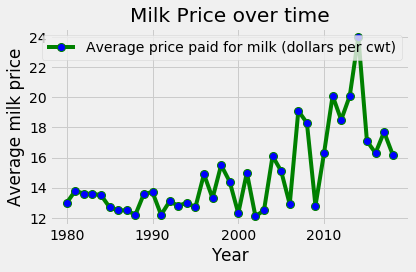

In [59]:
plt.figure(figsize=(,9))
time_series_analysis.plot(x='Year', y='Average price paid for milk (dollars per cwt)', color="g",marker='o', markerfacecolor='blue', markersize=8, linewidth=4)
plt.title("Milk Price over time")
plt.xlabel('Year');
plt.ylabel('Average milk price');
plt.savefig("Outputs/milk_price.png")
plt.tight_layout()

In [14]:
reduced_time_df = time_series_analysis.loc[:, ["Year", "Average price paid for milk (dollars per cwt)"]]
reduced_time_df.head()
new_red=reduced_time_df.set_index("Year")
new_red.head()
#reduced_time_df = reduced_time_df.loc[(reduced_time_df["pledged"] > 0)]
#reduced_time_df.head()



,Average price paid for milk (dollars per cwt)
Year,
1980,13.0
1981,13.8
1982,13.6
1983,13.6
1984,13.5


In [ ]:
#new_red.iplot(title="Milk price")

#new_red = pd.DataFrame(np.cumsum(np.random.randn(104)), 
                  #columns=['price'], index=datelist)

plt.plot(new_red['Year'].index, new_red['Year'].values)
#plt.plot(new_red[2017:].index, new_red[2017:].values)
# If you don't like the break in the graph, change 90 to 89 in the above line
plt.gcf().autofmt_xdate()
plt.show()

                                            ARIMA Model Results                                            
Dep. Variable:     D.Average price paid for milk (dollars per cwt)   No. Observations:                   38
Model:                                              ARIMA(5, 1, 0)   Log Likelihood                 -71.762
Method:                                                    css-mle   S.D. of innovations              1.545
Date:                                             Sat, 06 Apr 2019   AIC                            157.524
Time:                                                     11:49:06   BIC                            168.987
Sample:                                                          1   HQIC                           161.602
                                                                                                           
                                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------

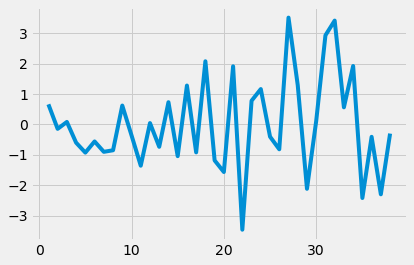

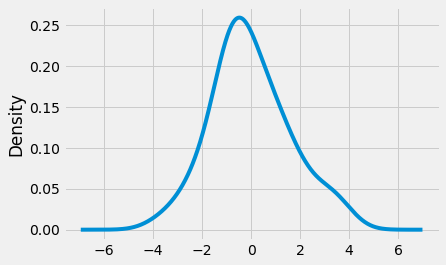

count    38.000000
mean     -0.008920
std       1.570551
min      -3.463595
25%      -0.915874
50%      -0.331254
75%       0.764733
max       3.510762
dtype: float64


In [27]:
predictions = list()
model = ARIMA(time_series_analysis['Average price paid for milk (dollars per cwt)'], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals =(model_fit.resid)

# plot

residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

# Get forecast 500 steps ahead in future

#pred_uc = residuals.get_forecast(steps=200)

# Get confidence intervals of forecasts
#pred_ci = pred_uc.conf_int()
#residuals.plot_diagnostics(figsize=(15, 12))
#plt.show()


In [38]:
model = ARIMA(time_series_analysis['Average price paid for milk (dollars per cwt)'], order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  

In [40]:
model = ARIMA(time_series_analysis['Average price paid for milk (dollars per cwt)'], order=(2, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(time_series_analysis.index.to_pydatetime(), time_series_analysis.values)
plt.plot(time_series_analysis.index.to_pydatetime(), results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-time_series_analysis)**2))

AttributeError: 'RangeIndex' object has no attribute 'to_pydatetime'

In [36]:
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
 #df.query("Sex =='male'")
series = new_red.query("Year =='Year'")
#(["Year"], header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

NameError: name 'yhat' is not defined

Average milk price is increasing over time period . It was high during 2012-2015 than droped. We have used ARIMA(Autoregressive Integrated Moving Average ) model to check the price is there any seasonality.

In [42]:
milk_consumption_analysis = pd.read_csv("Resources/us_consumption_milk_75_2017.csv")
milk_consumption_analysis.apply(pd.to_numeric).head()
milk_consumption_analysis.head()

,Year,Fluid milk,yogurt,Butter,American,Other,Cottage,Canned whole,Bulk whole,Bulk and canned skim,Ice creamRegular,Reduced fat,Sherbet,other frozen products,dry whole milk,Nonfat dry milk,Dry butter milk,Dry and,Milk equavalent milk-fat basis
0,1975,247,1.97,4.73,8.15,6.13,4.59,3.95,1.24,3.53,18.21,6.50,1.35,1.82,0.1,3.26,0.2,2.2,539.0
1,1976,247,2.13,4.31,8.88,6.63,4.63,3.79,1.10,3.59,17.64,6.17,1.36,1.68,0.2,3.50,0.2,2.4,540.0
2,1977,244,2.34,4.29,9.21,6.78,4.62,3.27,1.00,3.88,17.29,6.57,1.36,1.63,0.2,3.31,0.3,2.4,540.0
3,1978,241,2.45,4.35,9.53,7.31,4.60,3.15,0.90,3.47,17.23,6.55,1.29,1.51,0.3,3.10,0.2,2.4,544.0
4,1979,238,2.44,4.49,9.60,7.57,4.43,3.12,0.94,3.33,16.94,6.20,1.20,1.41,0.3,3.28,0.2,2.7,548.0


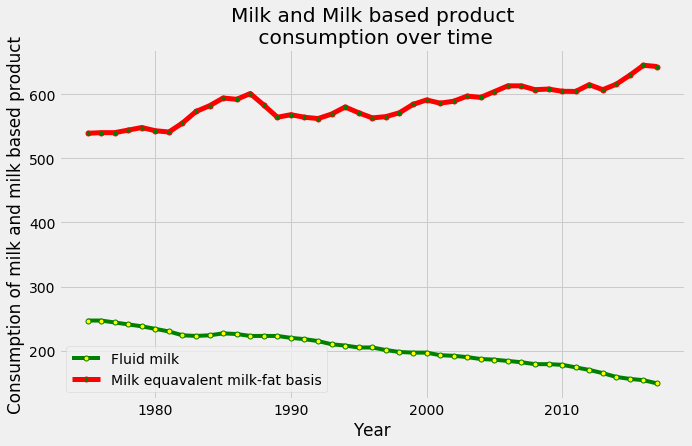

In [56]:
# multiple line plot
plt.figure(figsize=(10,6))
plt.plot( 'Year', 'Fluid milk', data=milk_consumption_analysis, marker='o', markerfacecolor='yellow', markersize=5, color='green', linewidth=4)
plt.plot( 'Year', 'Milk equavalent milk-fat basis', data=milk_consumption_analysis, marker='o',markerfacecolor='green',markersize=5, color='red', linewidth=5)
plt.title("Milk and Milk based product\n consumption over time");
plt.xlabel('Year');
plt.ylabel('Consumption of milk and milk based product');
plt.legend()
plt.savefig("Outputs/milk_dairy consumption.png")

